In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import json, datetime, os, sys
%matplotlib inline

# Nepal

In [12]:
n_data = pd.read_csv('nepal_shadowed.csv', header=None, names=['user','time','local'], index_col=False)
n_data['time'] = pd.to_datetime(n_data.time)

In [13]:
n_data.head()

,user,time,local
0,CarstenG,2009-10-28 12:06:29,True
1,seichter,2015-02-23 12:21:43,False
2,malenki,2015-02-14 20:59:07,False
3,malenki,2015-02-14 13:07:32,True
4,malenki,2015-02-14 13:07:28,True


In [14]:
n_local    = n_data.query('local').copy()
n_external = n_data.query('local==False').copy()

In [15]:
n_local_cnt = n_local.groupby(n_local['time'].map(lambda x: x.date())).agg({'user':pd.Series.count})
n_local_unq = n_local.groupby(n_local['time'].map(lambda x: x.date())).agg({'user':pd.Series.nunique})
n_external_cnt = n_external.groupby(n_external['time'].map(lambda x: x.date())).agg({'user':pd.Series.count})
n_external_unq = n_external.groupby(n_external['time'].map(lambda x: x.date())).agg({'user':pd.Series.nunique})

In [47]:
new_dates = pd.date_range('04/01/2005', periods=365*11, freq='D')

In [66]:
n_plot = pd.concat(
    [n_local_cnt.reindex(new_dates), 
     n_local_unq.reindex(new_dates), 
     n_external_cnt.reindex(new_dates), 
     n_external_unq.reindex(new_dates)], axis=1)
n_plot.columns = ['local knowledge edit','local knowledge users','basic edits', 'standard users']

In [67]:
n_plot.head()

,local knowledge edit,local knowledge users,basic edits,standard users
2005-04-01,NaN,NaN,NaN,NaN
2005-04-02,NaN,NaN,NaN,NaN
2005-04-03,NaN,NaN,NaN,NaN
2005-04-04,NaN,NaN,NaN,NaN
2005-04-05,NaN,NaN,NaN,NaN


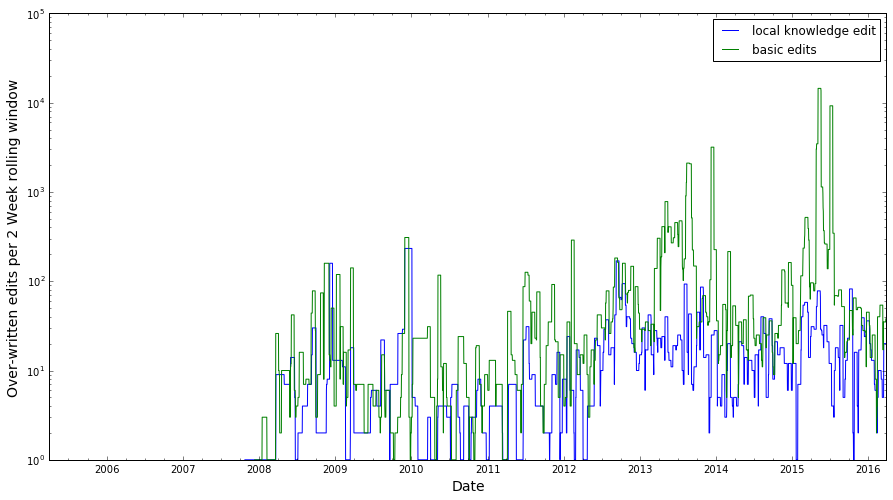

In [68]:
ax = n_plot[['local knowledge edit','basic edits']].fillna(method='ffill').rolling(14).max().plot(figsize=(15,8), logy=True)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Over-written edits per 2 Week rolling window", fontsize=14)

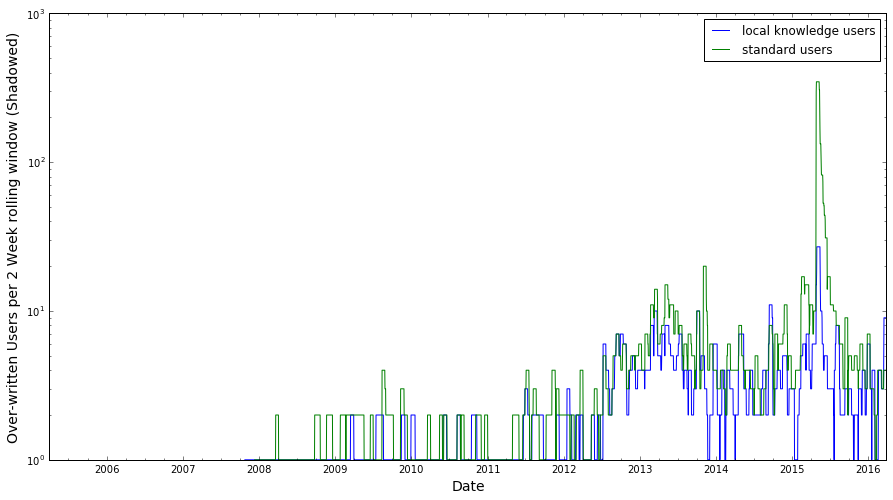

In [71]:
ax = n_plot[['local knowledge users','standard users']].fillna(method='ffill').rolling(14).max().plot(figsize=(15,8), logy=True)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Over-written Users per 2 Week rolling window (Shadowed)", fontsize=14)

# Colorado

In [2]:
c_data = pd.read_csv('colorado_shadowed.csv', header=None, names=['user','time','local'], index_col=False)
c_data['time'] = pd.to_datetime(c_data.time)

In [3]:
c_data.head()

,user,time,local
0,SK53,2010-02-23 22:33:33,False
1,SK53_bulk,2010-02-20 15:21:57,False
2,Dilys,2015-07-13 12:26:10,True
3,SK53_bulk,2010-02-20 15:21:57,False
4,techlady,2015-05-20 08:56:22,True


In [4]:
c_local    = c_data.query('local').copy()
c_external = c_data.query('local==False').copy()

In [5]:
c_local_cnt = c_local.groupby(c_local['time'].map(lambda x: x.date())).agg({'user':pd.Series.count})
c_local_unq = c_local.groupby(c_local['time'].map(lambda x: x.date())).agg({'user':pd.Series.nunique})
c_external_cnt = c_external.groupby(c_external['time'].map(lambda x: x.date())).agg({'user':pd.Series.count})
c_external_unq = c_external.groupby(c_external['time'].map(lambda x: x.date())).agg({'user':pd.Series.nunique})

In [6]:
new_dates = pd.date_range('2007-01-01', periods=365*10-60, freq='D')

In [7]:
c_plot = pd.concat(
    [c_local_cnt.reindex(new_dates), 
     c_local_unq.reindex(new_dates), 
     c_external_cnt.reindex(new_dates), 
     c_external_unq.reindex(new_dates)], axis=1)
c_plot.columns = ['local knowledge edits','local knowledge users','external edits', 'external users']

In [8]:
c_plot.head()

,local knowledge edits,local knowledge users,external edits,external users
2007-01-01,NaN,NaN,NaN,NaN
2007-01-02,NaN,NaN,NaN,NaN
2007-01-03,NaN,NaN,NaN,NaN
2007-01-04,NaN,NaN,NaN,NaN
2007-01-05,NaN,NaN,NaN,NaN


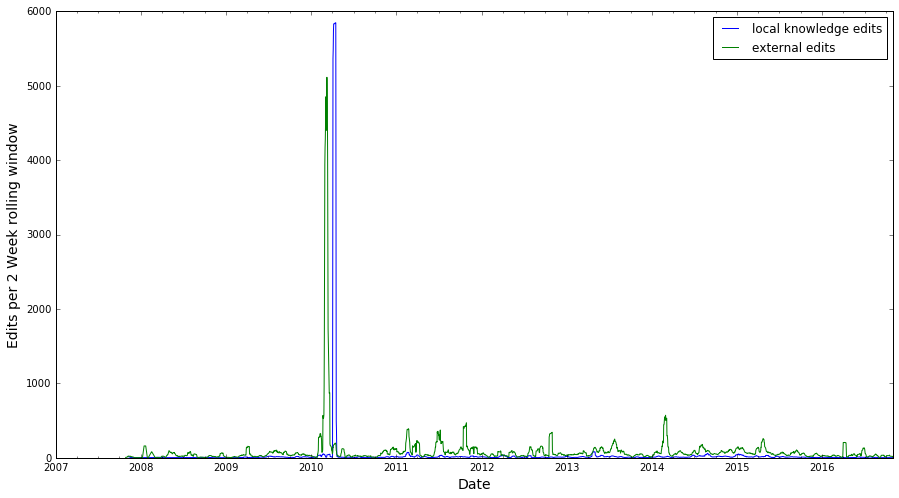

In [9]:
ax = c_plot[['local knowledge edits','external edits']].fillna(method='ffill').rolling(14).mean().plot(figsize=(15,8))
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Edits per 2 Week rolling window", fontsize=14)

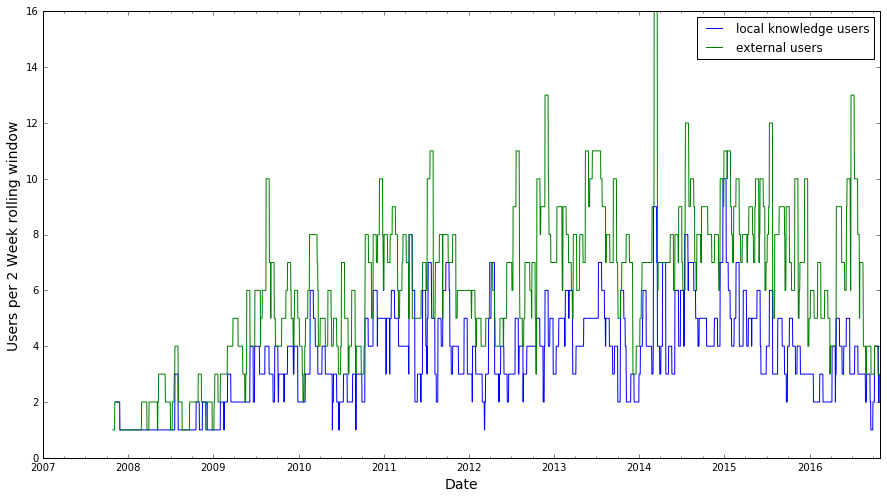

In [34]:
ax = c_plot[['local knowledge users','external users']].fillna(method='ffill').rolling(14).max().plot(figsize=(15,8))
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Users per 2 Week rolling window", fontsize=14)